# 목표: 타이타닉 데이터를 활용하여 생존률에 대한 통찰력을 얻고 싶다.
1. 먼저 데이터의 파라미터들을 정의하고
2. 어떻게 데이터를 활용할지 계획을 세운 후
3. 타이타닉 상황에서 생존률에 대한 통찰력을 얻어보자.

# 01. 라이브러리 및 데이터 불러오기
- 사용할 라이브러리 import 및 데이터 불러온 후
- 데이터의 info, describe, parameters(변수 정의)를 파악하자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

# 환경 설정
pd.set_option('display.max_columns', None) # 데이터 프레임 컬럼 최대출력 갯수제한 해제
pd.options.display.float_format = '{:.4f}'.format # 출력 소수점 자리 4자리로 제한

# Import 라이브러리 버전 체크
# print(np.__version__)         1.26.1
# print(pd.__version__)         2.1.3
# print(matplotlib.__version__) 3.8.1 
# print(sns.__version__)        0.13.0
# print(scipy.__version__)      1.11.3
# print(sklearn.__version__)    1.3.2

## 01-01. Import Data

In [2]:
df = pd.read_csv('../Data/Titanic_Data.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0000,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,691.0000,"Braund, Mr. Owen Harris",22.0000,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0000
1,2,1.0000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,90.0000,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0000,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0000
2,3,1.0000,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0000,"Heikkinen, Miss Laina",26.0000,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0000


## 01-02. Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## 01-03. Data Describe

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.0000,891.0000,1309.0000,1046.0000,1309.0000,1309.0000,1308.0000,1304.0000,1302.0000,1304.0000
mean,655.0000,0.3838,2.2949,29.8811,0.4989,0.3850,33.2955,658.5345,29.4158,2.2914
std,378.0201,0.4866,0.8378,14.4135,1.0417,0.8656,51.7587,380.3774,13.7590,0.8409
min,1.0000,0.0000,1.0000,0.1700,0.0000,0.0000,0.0000,1.0000,0.1700,1.0000
25%,328.0000,0.0000,2.0000,21.0000,0.0000,0.0000,7.8958,326.7500,21.0000,1.7500
50%,655.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542,661.5000,28.0000,3.0000
75%,982.0000,1.0000,3.0000,39.0000,1.0000,0.0000,31.2750,987.2500,37.7500,3.0000
max,1309.0000,1.0000,3.0000,80.0000,8.0000,9.0000,512.3292,1314.0000,74.0000,3.0000


## 01-04. Data Parameters

In [5]:
for index, column_name in enumerate(df.columns):
    print(f'-----{index+1}번째 컬럼-----')
    print(df[column_name].value_counts().head(5))
    # print("\n")

-----1번째 컬럼-----
PassengerId
1      1
861    1
879    1
878    1
877    1
Name: count, dtype: int64
-----2번째 컬럼-----
Survived
0.0000    549
1.0000    342
Name: count, dtype: int64
-----3번째 컬럼-----
Pclass
3    709
1    323
2    277
Name: count, dtype: int64
-----4번째 컬럼-----
Name
Connolly, Miss. Kate               2
Kelly, Mr. James                   2
Braund, Mr. Owen Harris            1
Johnson, Master. Harold Theodor    1
Gustafsson, Mr. Alfred Ossian      1
Name: count, dtype: int64
-----5번째 컬럼-----
Sex
male      843
female    466
Name: count, dtype: int64
-----6번째 컬럼-----
Age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
Name: count, dtype: int64
-----7번째 컬럼-----
SibSp
0    891
1    319
2     42
4     22
3     20
Name: count, dtype: int64
-----8번째 컬럼-----
Parch
0    1002
1     170
2     113
3       8
5       6
Name: count, dtype: int64
-----9번째 컬럼-----
Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: 

## 01-05. Column define

1. **PassengerId (승객 ID)**: 각 승객에게 할당된 고유 식별 번호입니다.
2. **Survived (생존 여부)**: 승객의 생존 여부를 나타냅니다. 0은 사망, 1은 생존을 의미합니다.
3. **Pclass (객실 등급)**: 승객의 객실 등급으로, 승객의 사회적, 경제적 지위를 나타냅니다. 1등급(1), 2등급(2), 3등급(3)이 있습니다.
4. **Name (승객 이름)**: 승객의 전체 이름입니다.
5. **Sex (성별)**: 승객의 성별입니다. 남성(male)과 여성(female)으로 구분됩니다.
6. **Age (나이)**: 승객의 나이입니다. 일부 누락된 값이 있을 수 있습니다.
7. **SibSp**: 함께 탑승한 형제, 자매, 배우자의 수입니다.
8. **Parch**: 함께 탑승한 부모, 자녀의 수입니다.
9. **Ticket (티켓 번호)**: 승객의 티켓 번호입니다.
10. **Fare (요금)**: 티켓의 요금입니다.
11. **Cabin (객실 번호)**: 승객이 머무른 객실의 번호입니다. 많은 누락된 값이 있을 수 있습니다.
12. **Embarked (탑승 항구)**: 승객이 타이타닉호에 탑승한 항구를 나타냅니다. C = Cherbourg, Q = Queenstown, S = Southampton입니다.
13. **WikiId**: 위키 데이터에서의 승객 식별 번호입니다.
14. **Name_wiki (위키에서의 이름)**: 위키 데이터에서의 승객 이름입니다.
15. **Age_wiki (위키에서의 나이)**: 위키 데이터에서의 승객 나이입니다.
16. **Hometown (고향)**: 승객의 고향입니다.
17. **Boarded (탑승 지점)**: 승객이 타이타닉호에 탑승한 지점입니다.
18. **Destination (목적지)**: 승객의 최종 목적지입니다.
19. **Lifeboat (구명보트)**: 탈출 시 사용한 구명보트 번호입니다.
20. **Body (시신 번호)**: 수습된 시신의 번호입니다.
21. **Class (등급)**: 승객의 사회적, 경제적 등급을 나타냅니다. 이는 `Pclass`와

▣ 종속변수: Survived

▣ 독립변수: Pclass, Sex, Age
1. Pclass: 승객의 사회적, 경제적 지위 1, 2, 3등급
2. Sex: Male(남), Female(여)
3. Age: 나이 유사한 정보를 제공할 수 있습니다.

## 01-06. Data Processing

In [6]:
df.isna().sum()

# 결측치 수
# Survived 418
# Pclass 0
# Sex 0
# Age 263
# 생존여부와 승객의 나이에 결측치가 보이므로 결측치 처리를 어떻게 할지 고민 해야됨

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [7]:
# 먼저 필요한 변수들만 추출하도록 하자
A01 = df[['Survived', 'Pclass', 'Sex', 'Age']]
A01.head(3)

,Survived,Pclass,Sex,Age
0,0.0000,3,male,22.0000
1,1.0000,1,female,38.0000
2,1.0000,3,female,26.0000


In [8]:
# 생존 여부가 확인되지 않았음에도 Pclass, Sex, Age 데이터가 있다는게 해석하기 난해하다.
# 추론을 통해 데이터의 결측치를 대체할 방법을 찾아야하는데 당시의 상황을 판단하기가 힘들다.
A_Survived_NA = A01[A01['Survived'].isna()]
A_Survived_NA

,Survived,Pclass,Sex,Age
891,NaN,3,male,34.5000
892,NaN,3,female,47.0000
893,NaN,2,male,62.0000
894,NaN,3,male,27.0000
895,NaN,3,female,22.0000
...,...,...,...,...
1304,NaN,3,male,NaN
1305,NaN,1,female,39.0000
1306,NaN,3,male,38.5000
1307,NaN,3,male,NaN


In [9]:
print(A01.isna().sum())
# 생존여부의 결측치가 418개
# 승객나이의 결측치가 263개

# 행을 기준으로 결측치 수를 중복없이 체크하려면?
print(A01.isna().any(axis=1).sum()) # 결측치가 있는 고유 행 595개
print(len(A01)) # 데이터의 총 rows 갯수는 1309개다.
print((len(A01)) - (A01.isna().any(axis=1).sum())) # 결측치를 제거하게된다면 714개의 행 데이터가 남는다.

# 그렇다면 총 데이터에서 결측치를 임의로 대체할 수 없으니 714개의 행 데이터로만 쓸까?
# 고민 고민 고민 돼...

Survived    418
Pclass        0
Sex           0
Age         263
dtype: int64
595
1309
714


In [10]:
print(A01.shape)

(1309, 4)


In [11]:
# 임의로 결측치를 대체할 방안이 생각이 안나므로
# 결측치는 제거하기로 결정했다.
A02 = A01.copy()
A02.dropna(inplace=True)

# 결측치 제거 후 인덱스 정렬
A02 = A02.reset_index(drop=True)
A02.info()
A02.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    float64
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.4+ KB


,Survived,Pclass,Sex,Age
0,0.0000,3,male,22.0000
1,1.0000,1,female,38.0000
2,1.0000,3,female,26.0000


In [12]:
# 생존여부 및 나이가 float 형태로 되어있으므로 데이터 타입을 변형해주자.
A03 = A02.copy()
A03 = A03.astype({'Survived': 'int64', 'Age': 'int64'})
A03.info()
A03.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  714 non-null    int64 
 1   Pclass    714 non-null    int64 
 2   Sex       714 non-null    object
 3   Age       714 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.4+ KB


,Survived,Pclass,Sex,Age
0,0,3,male,22
1,1,1,female,38
2,1,3,female,26


In [31]:
# A03 작업에서 데이터 타입을 변형 시켰다.
# 연령대간의 생존여부를 체크하기 위해 나이를 기준으로 연령대를 생성해주자.
A04 = A03.copy()
# A04['Age'].value_counts()

AgeBand = ['Youth', 'Adults', 'Middle-Age', 'Elderly']

def AgeRg (x) :
    
    if x['Age'] <= 20 :
        return AgeBand[0]
        
    elif x['Age'] <= 40 :
        return AgeBand[1]
        
    elif x['Age'] <= 60 :
        return AgeBand[2]
        
    else :
        return AgeBand[3]
        
A04['AgeRange'] = A04.apply(AgeRg, axis=1)
A04.head(3)

,Survived,Pclass,Sex,Age,AgeRange
0,0,3,male,22,Adults
1,1,1,female,38,Adults
2,1,3,female,26,Adults


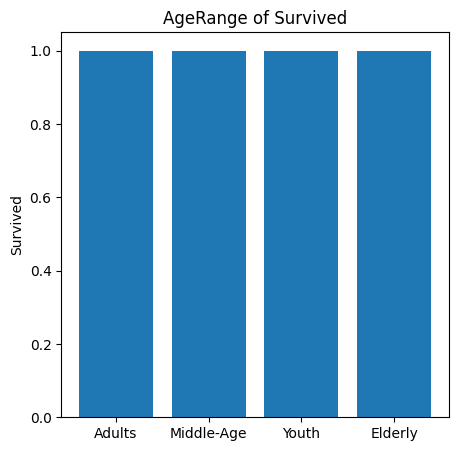

In [35]:
A

f, ax = plt.subplots(figsize=(5, 5))

ax.bar(A04['AgeRange'], A04['Survived'])
ax.set_title('AgeRange of Survived')
ax.set_ylabel('Survived')
plt.show()

# 02. 탐색적 데이터 분석

## 02-01. 연령대에 대한 분석

<Axes: xlabel='Age', ylabel='Count'>

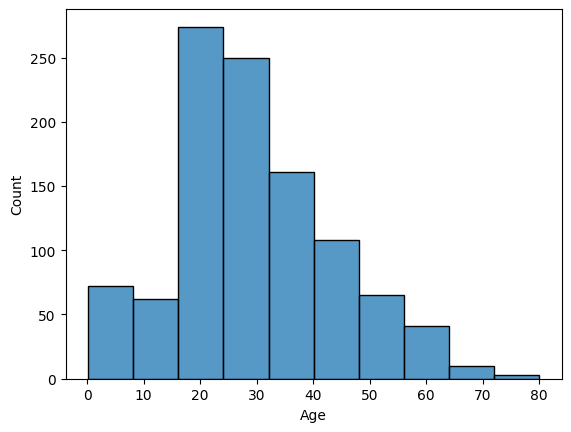

In [14]:
sns.histplot(x = df['Age'], data=df, bins=10)